In [ ]:
import zipfile

from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your zip file (if it's uploaded or in your Drive)
zip_path = '/content/drive/MyDrive/Worksheet 5/FruitinAmazon.zip'

# Specify the destination directory where you want to extract the contents
Extract_dir = '/content/drive/MyDrive/Worksheet 5/Extracted_data'

# Create the directory if it doesn't exist
import os
os.makedirs(Extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(Extract_dir)

print("Extraction complete!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extraction complete!


Task 1

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
# Define the dataset directory
train_dir = "/content/drive/MyDrive/Worksheet 5/Extracted_data/FruitinAmazon 2/test"


In [ ]:
# Get the list of class directories
class_names = sorted(os.listdir(train_dir))


In [ ]:
# Select one random image from each class
selected_images = []
labels = []

In [ ]:
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        image_files = os.listdir(class_path)  # List all images
        if image_files:  # Check if there are images in the folder
            img_file = random.choice(image_files)  # Randomly select one image
            img_path = os.path.join(class_path, img_file)  # Get full image path
            selected_images.append(img_path)
            labels.append(class_name)

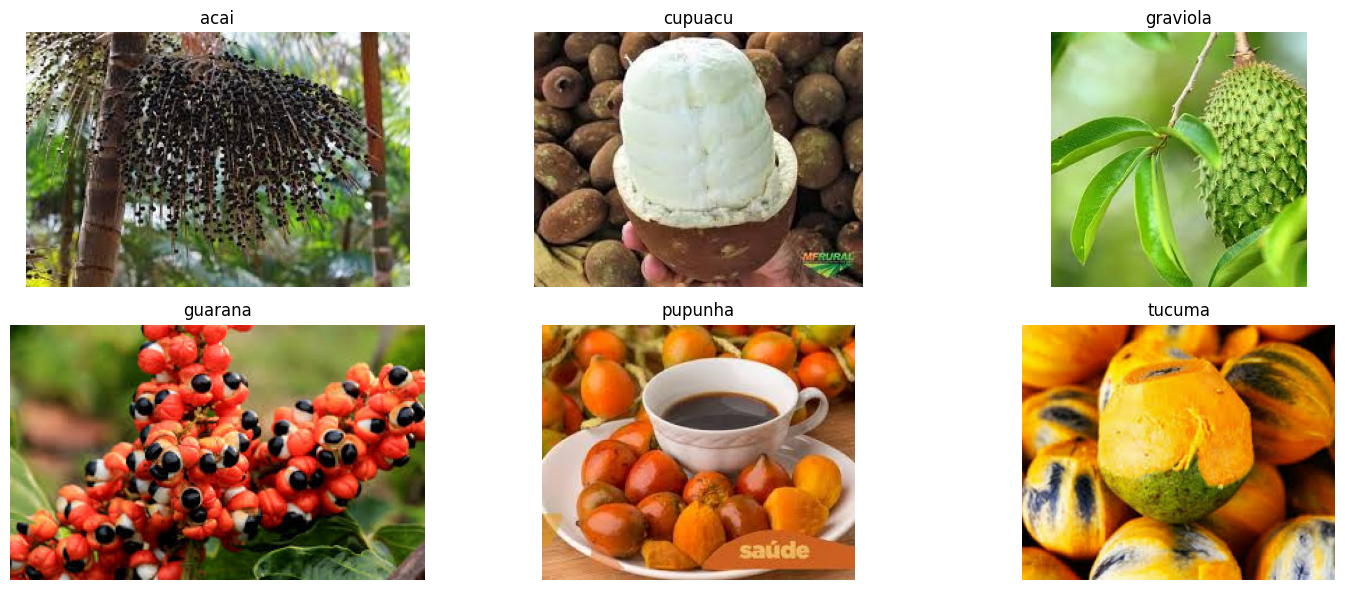

In [ ]:
# Display images in a grid format (2 rows)
fig, axes = plt.subplots(nrows=2, ncols=len(selected_images)//2, figsize=(15, 6))
axes = axes.flatten()

for ax, img_path, label in zip(axes, selected_images, labels):
    img = mpimg.imread(img_path)  # Read the image correctly
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()



Check for Corrupted Image

In [ ]:
import os
from PIL import Image

In [ ]:
# Define the dataset directory
train_dir = "/content/drive/MyDrive/Worksheet 5/Extracted_data/FruitinAmazon 2/train"  # Update this path

In [ ]:
# List of corrupted images
corrupted_images = []

In [ ]:
# Iterate through each class folder
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                with Image.open(image_path) as img:
                    img.verify()  # Verify if the image is valid
            except (IOError, SyntaxError):  # If error, image is corrupted
                corrupted_images.append(image_path)
                os.remove(image_path)  # Remove the corrupted image
                print(f"Removed corrupted image: {image_path}")


In [ ]:
# Final Report
if not corrupted_images:
    print("No Corrupted Images Found.")
else:
    print(f"\nTotal Corrupted Images Removed: {len(corrupted_images)}")


No Corrupted Images Found.


Task 2

In [ ]:
import tensorflow as tf


In [ ]:
# Define dataset path
train_dir = "/content/drive/MyDrive/Worksheet 5/Extracted_data/FruitinAmazon 2/train"


In [ ]:
# Define image size and batch size
img_height, img_width = 128, 128  # Resize images to 128x128
batch_size = 32  # Number of images in each batch
validation_split = 0.2  # 80% training, 20% validation

In [ ]:
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

In [ ]:
# Load and preprocess the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Labels inferred from folder names
    label_mode='int',  # Labels encoded as integers
    image_size=(img_height, img_width),
    interpolation='nearest',  # Resize using nearest neighbor
    batch_size=batch_size,
    shuffle=True,  # Shuffle images for training
    validation_split=validation_split,
    subset='training',  # Load training data
    seed=123  # Ensures reproducibility
).map(lambda x, y: (rescale(x), y))  # Apply normalization

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [ ]:
# Load and preprocess the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,  # No shuffle for validation
    validation_split=validation_split,
    subset='validation',  # Load validation data
    seed=123
).map(lambda x, y: (rescale(x), y))  # Apply normalization


Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# Define image dimensions and number of classes
img_height, img_width = 128, 128  # Image size
num_classes = 10  # Example: Adjust based on your dataset

In [ ]:
# Build the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected (Dense) Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Assuming integer labels
              metrics=['accuracy'])


In [ ]:
# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

Task 4 Compile the Model

In [ ]:
import tensorflow as tf

# Example of a model compilation for a classification task
model.compile(
    optimizer='adam',  # Adam optimizer is widely used for its adaptive learning rate
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Accuracy as the evaluation metric
)


Task 4: Train the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Define a simple sequential model with an updated input shape
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Updated input shape (128x128 RGB images)
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # This layer should now have the appropriate input size
    Dense(10, activation='softmax')  # For 10-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(),  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy for multi-class classification
    metrics=['accuracy']  # Track accuracy
)

# Define the callbacks
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    train_ds,  # Your training dataset
    validation_data=val_ds,  # Your validation dataset
    epochs=250,
    batch_size=16,
    callbacks=[checkpoint, early_stopping],  # Use both callbacks
    verbose=1
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.1036 - loss: 4.5792
Epoch 1: val_loss improved from inf to 15.06497, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1124 - loss: 4.9534 - val_accuracy: 0.0000e+00 - val_loss: 15.0650
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.2905 - loss: 15.2976
Epoch 2: val_loss improved from 15.06497 to 2.36624, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 872ms/step - accuracy: 0.2873 - loss: 15.3820 - val_accuracy: 0.2778 - val_loss: 2.3662
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.2541 - loss: 13.0249
Epoch 3: val_loss did not improve from 2.36624
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step - accuracy: 0.2600 - loss: 12.8627 - val_accuracy: 0.3333 - val_loss: 2.5537
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.4850 - loss: 6.2767
Epoch 4: val_loss improved from 2.36624 to 1.94729, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 901ms/step - accuracy: 0.4852 - loss: 6.1760 - val_accuracy: 0.6111 - val_loss: 1.9473
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.5191 - loss: 2.4459
Epoch 5: val_loss improved from 1.94729 to 0.65690, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5247 - loss: 2.3799 - val_accuracy: 0.7778 - val_loss: 0.6569
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.7159 - loss: 0.8334
Epoch 6: val_loss did not improve from 0.65690
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 530ms/step - accuracy: 0.7105 - loss: 0.8531 - val_accuracy: 0.4444 - val_loss: 1.4670
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.6742 - loss: 1.0745
Epoch 7: val_loss improved from 0.65690 to 0.65352, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 990ms/step - accuracy: 0.6793 - loss: 1.0462 - val_accuracy: 0.7222 - val_loss: 0.6535
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.8889 - loss: 0.3734
Epoch 8: val_loss improved from 0.65352 to 0.34018, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8958 - loss: 0.3526 - val_accuracy: 0.8333 - val_loss: 0.3402
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.9398 - loss: 0.1481
Epoch 9: val_loss did not improve from 0.34018
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 879ms/step - accuracy: 0.9410 - loss: 0.1480 - val_accuracy: 0.8333 - val_loss: 0.6074
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9502 - loss: 0.2230
Epoch 10: val_loss did not improve from 0.34018
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.9488 - loss: 0.2250 - val_accuracy: 0.8333 - val_loss: 0.5734
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9699 - loss: 0.0778
Epoch 11: val_loss did not improve from 0.34018
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 525ms/step - accuracy: 0.9705 - loss: 0.0761 - val_accuracy: 0.8333 - val_loss: 0.4490
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 1.0000 - loss: 0.0186
Epoch 12: val_loss did not improve from 0.34018
3/3 ━━━━━

Task 5: Evaluate the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6864 - loss: 1.1145
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5887 - loss: 0.9340 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7385 - loss: 0.8368  
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6876 - loss: 0.7567 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6909 - loss: 0.7036 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9207 - loss: 0.6421 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9232 - loss: 0.5855 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9191 - loss: 0.5542 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9261 - loss: 0.5254 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9193 - loss: 0.4647 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9000 - loss: 0.4488
Test Loss: 0.4488205909729004
Test Accuracy: 0.8999999761581421


Task 6: Save and Load the Model

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Save the trained model to a .h5 file
model.save('iris_model.h5')
print("Model saved to 'iris_model.h5'")

# Load the saved model
loaded_model = load_model('iris_model.h5')
print("Model loaded from 'iris_model.h5'")

# Re-evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3431 - loss: 1.1314
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4766 - loss: 1.0143 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5045 - loss: 0.9588 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6299 - loss: 0.9018 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6971 - loss: 0.8703 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7953 - loss: 0.8042 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7824 - loss: 0.7680 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8514 - loss: 0.7062 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7942 - loss: 0.6614 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8951 - loss: 0.6437 


Model saved to 'iris_model.h5'


Model loaded from 'iris_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9333 - loss: 0.5842
Test Loss: 0.5842301845550537
Test Accuracy: 0.9333333373069763


Task 7: Predictions and Classification Report

In [ ]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Save the trained model to a .h5 file
model.save('iris_model.h5')
print("Model saved to 'iris_model.h5'")

# Load the saved model
loaded_model = load_model('iris_model.h5')
print("Model loaded from 'iris_model.h5'")

# Make predictions on the test set
predictions = loaded_model.predict(X_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(report)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4955 - loss: 1.0842
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3412 - loss: 1.0100 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6128 - loss: 0.9496
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8093 - loss: 0.8875
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8791 - loss: 0.8211
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9563 - loss: 0.7698  
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7964 - loss: 0.6929
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8024 - loss: 0.6292 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8912 - loss: 0.5764
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8813 - loss: 0.5191 


Model saved to 'iris_model.h5'


Model loaded from 'iris_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.8560 - loss: 0.5232 - val_accuracy: 0.9583 - val_loss: 0.4934
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9164 - loss: 0.4849 - val_accuracy: 0.9583 - val_loss: 0.4878
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9354 - loss: 0.4142 - val_accuracy: 0.9167 - val_loss: 0.4750
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9250 - loss: 0.4316 - val_accuracy: 1.0000 - val_loss: 0.4260
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9537 - loss: 0.3965 - val_accuracy: 0.9583 - val_loss: 0.4218
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9280 - loss: 0.3818 - val_accuracy: 0.9583 - val_loss: 0.4201
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9263 - loss: 0.4012 - val_accuracy: 0.9583 - val_loss: 0.3855
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9423 - loss: 0.3677 - val_accuracy: 0.9583 - val_loss: 0.3700

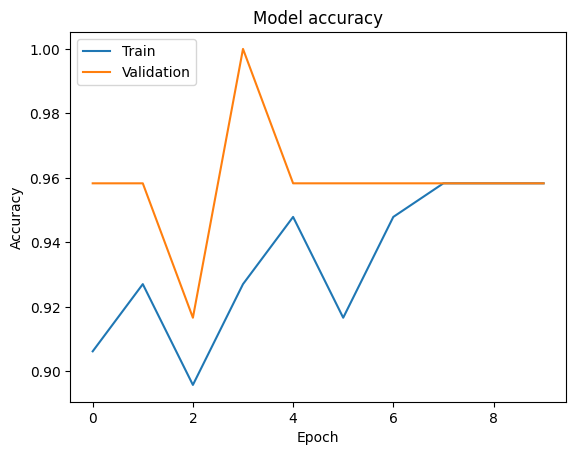

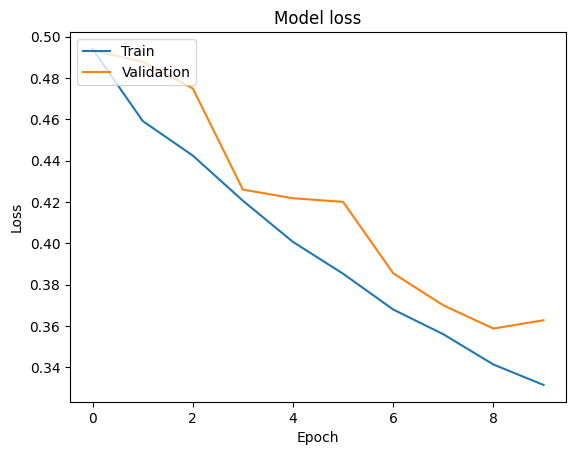

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
